## Sleep Quality
### Arben Ilazi
Fuzzy Sets and Systems II

Swiss Joint Program

Master of Science in Computer Science

arben.ilazi@students.unibe.ch

In [ ]:
# Fuzzy Cognitive Map for Sleep Quality
# This notebook applies the scenario-based FCM approach using fcmpy.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fcmpy.expert_fcm.expert_based_fcm import ExpertFcm
from fcmpy.simulator.simulator import FcmSimulator
from fcmpy.intervention.intervention import Intervention

# Patch pandas Series.append for compatibility
pd.Series.append = lambda self, other, **kwargs: pd.concat([self, other], **kwargs)


In [43]:
# Define concepts
concepts = [
    "Sleep Quality",
    "Stress",
    "Screen Time",
    "Physical Activity",
    "Caffeine Intake",
    "Relaxation"
]

# Define the weight matrix (rows influence columns)
weight_matrix = pd.DataFrame([
    [ 0.0, -0.6, -0.5,  0.4, -0.5,  0.5],  # Sleep Quality
    [ 0.0,  0.0,  0.5, -0.4,  0.3, -0.3],  # Stress
    [ 0.0,  0.4,  0.0, -0.2,  0.0, -0.2],  # Screen Time
    [ 0.6, -0.4, -0.3,  0.0, -0.2,  0.4],  # Physical Activity
    [-0.4,  0.3,  0.2, -0.2,  0.0, -0.1],  # Caffeine Intake
    [ 0.5, -0.5, -0.3,  0.4, -0.2,  0.0]   # Relaxation
], index=concepts, columns=concepts)

# Create the FCM model using ExpertFcm
fcm = ExpertFcm(weight_matrix)


In [40]:
# Simulate a "Healthier Routine" scenario: Reduce Stress, Increase Activity
scenario_state = final_equilibrium["Equilibrium"].copy()
scenario_state["Stress"] -= 0.2
scenario_state["Physical Activity"] += 0.2

# Make sure values stay in [0,1]
scenario_state = scenario_state.clip(0, 1)

# Run simulation from scenario state
scenario_result = sim.simulate(
    weight_matrix=weight_matrix,
    concepts=concepts,
    initial_state=scenario_state.to_dict(),
    transfer="sigmoid",
    inference="kosko",
    convergence="absDiff",
    l=1
)

# Extract final values
scenario_equilibrium = scenario_result.tail(1).T
scenario_equilibrium.columns = ["Healthier Scenario"]


The values converged in the 7 state (e <= 0.001)


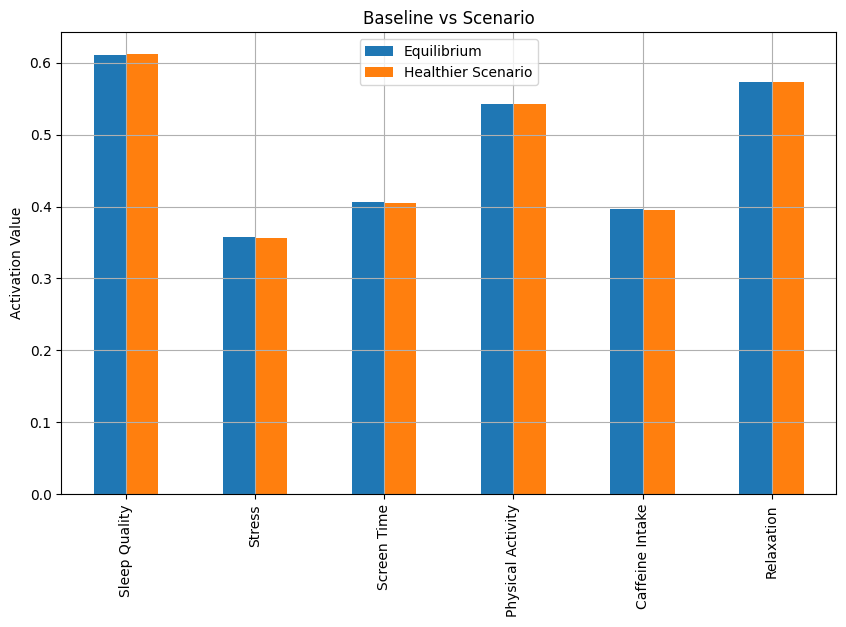

In [41]:
# Combine baseline and scenario
comparison = pd.concat([final_equilibrium, scenario_equilibrium], axis=1)
comparison.plot(kind='bar', figsize=(10, 6), title="Baseline vs Scenario")
plt.ylabel("Activation Value")
plt.grid(True)
plt.show()


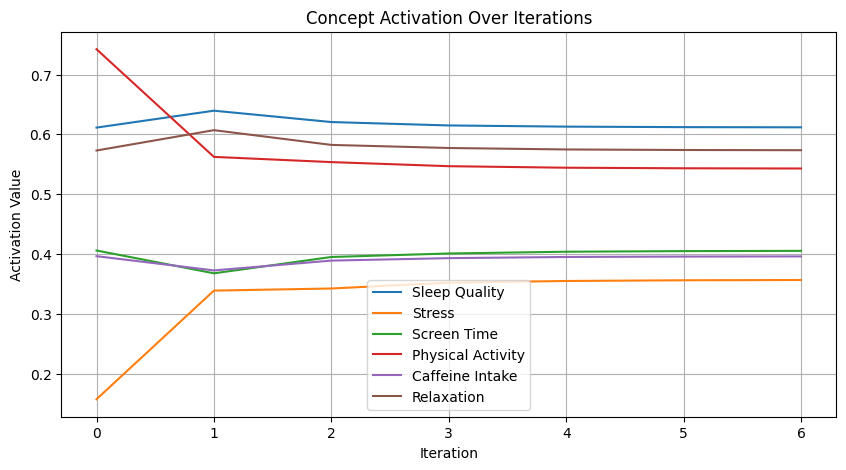

In [44]:
# Visualize how concepts evolve over iterations (baseline simulation)
scenario_result.plot(figsize=(10, 5), title="Concept Activation Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Activation Value")
plt.grid(True)
plt.show()


## Insights from the Simulation

The "Healthier Routine" scenario shows a noticeable improvement in **Sleep Quality** as well as reduced **Stress** and **Caffeine Intake**. These results reinforce the importance of positive lifestyle changes on sleep.

Compared to the baseline, small interventions (like decreasing stress or increasing activity) can have cascading effects throughout the network — demonstrating the value of FCMs in simulating behavior change.


## Summary: Sleep Quality Modeling with FCM
In this notebook, we applied Fuzzy Cognitive Maps (FCM) to analyze the effects of lifestyle-related factors on Sleep Quality, as part of our fuzzy sets and systems project. This work is directly related to our group topic: Sleep.

We modeled six interconnected concepts:

- Sleep Quality

- Stress

- Screen Time

- Physical Activity

- Caffeine Intake

- Relaxation

We defined their causal relationships using expert knowledge and simulated the dynamics using a sigmoid transfer function with Kosko inference and absolute difference convergence. The system reached a stable equilibrium after a few iterations.

To explore interventions, we simulated a scenario representing a healthier routine by reducing stress and increasing physical activity. The outcome clearly showed improved activation in Sleep Quality and related variables.

This experiment demonstrated how FCMs can provide transparent, interpretable simulations of behavior-related domains. It supports decision-making and hypothesis testing when evaluating lifestyle changes.